In [1]:
# https://github.com/Ironhack-Data-0621-Remote/lab-customer-analysis-round-2

# Lab | Customer Analysis Round 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import pandas as pd
df = pd.read_csv('/Users/ignaciolorenzoqueralt/Documents/Ironhack/labs/lab-customer-analysis-round-2-main/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [3]:
# 1 Show the dataframe shape.
print("The shape of df is ", df.shape)


The shape of df is  (10910, 26)


In [4]:
# 2 Standardize header names.
    #low cases
df.columns = df.columns.str.lower()
    
    #replace space with _
df_columns = []
for col in df.columns:
    col_ = col.replace(' ', '_')
    df_columns.append(col_)
df.columns = df_columns
df
    #unnamed:_0 to id
df = df.rename(columns={'unnamed:_0':'id'})
df

,id,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
# 3 Which columns are numerical?

num_df = df.select_dtypes(include=np.number)
num_df.columns

Index(['id', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [6]:
# 4 Which columns are categorical?
cat_df = df.select_dtypes(include='category')
cat_df.columns

Index([], dtype='object')

In [7]:
# 5 Check and deal with NaN values.
print(df.isnull().sum())
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

id                                  0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

,id,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
1,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
2,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
3,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
4,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
4539,10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
4540,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
4541,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [8]:
# 6 Datetime format 
    # Extract the months from the dataset and store in a separate column.
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors ='coerce')

months = []
for d in range(len(dates)):
    month = df['effective_to_date'][d].month
    months.append(month)

df['months'] = months
df
# Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
df[df['months']<=3]

<ipython-input-8-75abc073545f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors ='coerce')


NameError: name 'dates' is not defined

In [9]:
# Bonus

In [10]:
# Lab | Customer Analysis Round 3

In [11]:
# 1 Show DataFrame info.
df.info

<bound method DataFrame.info of          id customer       state  customer_lifetime_value response  coverage  \
0         2  LZ68649  Washington             14947.917300       No     Basic   
1         3  XL78013      Oregon             22332.439460      Yes  Extended   
2        10  HG93801     Arizona              5154.764074       No  Extended   
3        13  KR82385  California              5454.587929       No     Basic   
4        16  FH51383  California              5326.677654       No     Basic   
...     ...      ...         ...                      ...      ...       ...   
4538  10902  PP30874  California              3579.023825       No  Extended   
4539  10903  SU71163     Arizona              2771.663013       No     Basic   
4540  10904  QI63521      Nevada             19228.463620       No     Basic   
4541  10906  KX53892      Oregon              5259.444853       No     Basic   
4542  10908  WA60547  California             11971.977650       No   Premium   

       

In [12]:
# 2 Describe DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4543.0,5540.241250,3149.146534,2.000000,2884.000000,5549.000000,8283.000000,10908.000000
customer_lifetime_value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly_premium_auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months_since_last_claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number_of_open_complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678


In [13]:
df.dtypes

id                                        int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

641


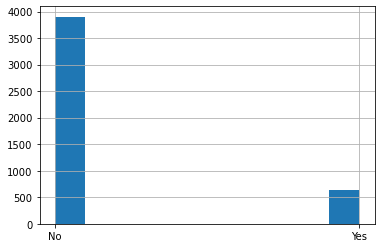

In [14]:
# 3 Show a plot of the total number of responses.
response_yes = df['response'] == 'Yes'
print(response_yes.sum())

df['response'].hist()
plt.show()

In [15]:
df_4 = df['sales_channel']
df_4

0       Call Center
1            Branch
2            Branch
3       Call Center
4       Call Center
           ...     
4538          Agent
4539         Branch
4540         Branch
4541         Branch
4542         Branch
Name: sales_channel, Length: 4543, dtype: object

/Users/ignaciolorenzoqueralt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='response', ylabel='sales_channel'>

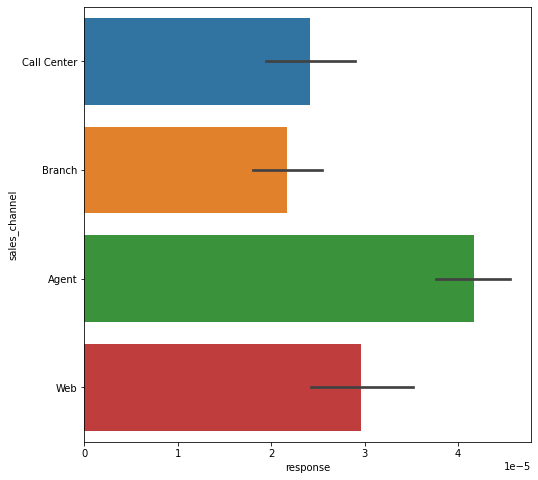

In [16]:
# 4 Show a plot of the response rate by the sales channel.
plt.figure(figsize=(8,8))

response_rate = response_yes / df['response'].count()

x=df["sales_channel"]
y= response_rate

sns.barplot(y, x, data=df)

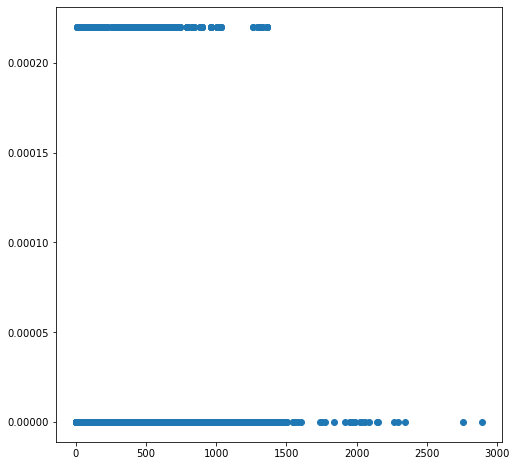

In [17]:
# 5 Show a plot of the response rate by the total claim amount.
plt.figure(figsize=(8,8))

x= df["total_claim_amount"]
y= response_rate

plt.scatter(x, y)
plt.show()

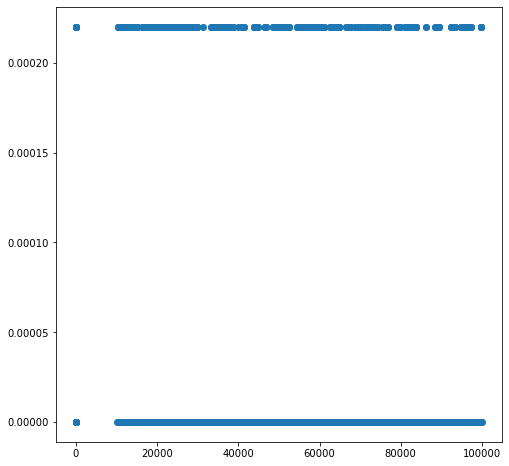

In [18]:
# 6 Show a plot of the response rate by income.
plt.figure(figsize=(8,8))

x= df["income"]
y= response_rate

plt.scatter(x, y)
plt.show()

In [19]:
print(response_rate)

0       0.00000
1       0.00022
2       0.00000
3       0.00000
4       0.00000
         ...   
4538    0.00000
4539    0.00000
4540    0.00000
4541    0.00000
4542    0.00000
Name: response, Length: 4543, dtype: float64


In [27]:
# 6
df6 = df[df['income']>0]
#df6 = df.groupby(['income']).count()
    #df6 = df[df['response'] == 'Yes'].count()
    #df6 = df['response']
#df6 = df6.loc[:, ['response']]
df6

,id,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
1,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
2,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
3,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
4,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,10897,MM70762,Arizona,9075.768214,Yes,Basic,Master,2011-01-26,Employed,M,...,0.0,8,Personal Auto,Personal L1,Offer1,Agent,158.077504,Sports Car,Medsize,A
4538,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
4539,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
4541,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [191]:
unique_incomes = df["income"].unique()
unique_incomes
count_unique_incomes = []
headers = ['unique_incomes', 'count_unique_incomes']

for i in unique_incomes:
    count_unique_incomes.append(len(df[df["income"]== i]))
count_unique_incomes

data_ex6 = [unique_incomes, count_unique_incomes]
df_data_ex6 = pd.concat(data_ex6, axis=1, keys=headers)

#unable to create df of unique incomes and number of responses per unique income

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid